In [1]:
from pathlib import Path 
import pandas as pd 
import numpy as np 
from datetime import datetime

In [2]:
bitcoin_df = pd.read_csv(Path('Resources/Bitcoin Historical Data - Investing.com.csv'), parse_dates=True, 
                         infer_datetime_format=True, index_col = 'Date').sort_index()
bitcoin_df.tail()

,Price,Daily_Returns
Date,,
2020-04-11,6867.8,0.0007
2020-04-12,6917.6,0.0073
2020-04-13,6841.3,-0.0110
2020-04-14,6850.9,0.0014
2020-04-15,6736.9,-0.0166


In [3]:
bitcoin_df.head()

,Price,Daily_Returns
Date,,
2015-01-01,314.9,-0.0105
2015-01-02,315.2,0.0010
2015-01-03,287.1,-0.0891
2015-01-04,264.7,-0.0780
2015-01-05,274.8,0.0382


In [4]:
bitcoin_df['Volatility'] = bitcoin_df.Daily_Returns.rolling(window=30).std()
bitcoin_df.dropna(inplace=True)

In [5]:
bitcoin_df.head()

,Price,Daily_Returns,Volatility
Date,,,
2015-01-30,231.8,-0.0092,0.088220
2015-01-31,218.5,-0.0575,0.088707
2015-02-01,225.3,0.0310,0.088983
2015-02-02,238.9,0.0602,0.088419
2015-02-03,227.4,-0.0479,0.087697


In [6]:
bitcoin_twr = pd.read_csv(Path('Resources/coindesk_btc.csv'), parse_dates=True, infer_datetime_format=True)
bitcoin_twr.drop(columns=['username','to','favorites','geo','mentions','hashtags','id','permalink'], inplace=True)
bitcoin_twr.head()
#change date column to datetime
bitcoin_twr['date'] = pd.to_datetime(bitcoin_twr['date'], format='%Y-%m-%d')
# Remove timestamp
bitcoin_twr['date']=bitcoin_twr['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
# change index to date
bitcoin_twr.set_index('date', inplace = True)
bitcoin_twr.index = pd.to_datetime(bitcoin_twr.index)
bitcoin_twr.head()

,replies,retweets,text
date,,,
2020-04-13,3,10,MARKET WRAP: Bearish signals have analysts sea...
2020-04-13,2,5,IN DEPTH: As the EU navigates privacy protecti...
2020-04-13,0,6,Renowned economist and author Carlota Perez @C...
2020-04-13,2,9,IN DEPTH: Engineers in the Midwest are creatin...
2020-04-13,1,12,NEW: @HuobiGlobal has launched a new in-house ...


In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
# Code to download wordnet corpora
import nltk 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
def process_text(doc):
   # doc = str(doc)
    sw = set(stopwords.words('english'))
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lemm_words = [lemmatizer.lemmatize(word) for word in words]
    final_words = [word.lower() for word in lemm_words if word.lower() not in sw]
    #returns a large string of all words from all articles in corpus
    return ' '.join(final_words)

In [9]:
for row, column in bitcoin_twr.items():
    if column.name == 'text':
        #print(column.name)
        bitcoin_twr[column.name] = bitcoin_twr[column.name].apply(lambda x: process_text(x))

In [10]:
bitcoin_twr.sort_index(inplace=True)
bitcoin_twr.head()

,replies,retweets,text
date,,,
2018-02-12,6,30,dont miss upcoming cryptocurrency capital mark...
2018-02-12,49,464,jpmorgan report crypto could one day help dive...
2018-02-13,5,35,russian ministry proposes capital mandates ico...
2018-02-13,19,43,better late never time regulators put crypto n...
2018-02-13,15,183,expect congress talks blockchain tomorrow http...


### Using Mohan's Funtions

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [12]:
def retVComp(text):
    """
        Accepts a string of text and Returns compound from polarity scoring in the form of a FLOAT
    """
    return analyzer.polarity_scores(text)['compound']

In [13]:
sentList = []
for row in bitcoin_twr['text']:
    sentList.append(retVComp(row))

bitcoin_twr['sentiment'] = sentList
bitcoin_twr.head()

,replies,retweets,text,sentiment
date,,,,
2018-02-12,6,30,dont miss upcoming cryptocurrency capital mark...,0.5781
2018-02-12,49,464,jpmorgan report crypto could one day help dive...,0.4019
2018-02-13,5,35,russian ministry proposes capital mandates ico...,0.0000
2018-02-13,19,43,better late never time regulators put crypto n...,0.4404
2018-02-13,15,183,expect congress talks blockchain tomorrow http...,0.0000


In [14]:
possible_df=bitcoin_twr[['replies','retweets',
                         'sentiment']].groupby(bitcoin_twr.index.date).sum()

In [15]:
possible_df.head()

,replies,retweets,sentiment
2018-02-12,55,494,0.9800
2018-02-13,296,1230,0.9804
2018-02-14,452,2681,7.4990
2018-02-15,479,1732,0.0431
2018-02-16,387,1383,0.5844


In [16]:
join_df = possible_df.join(bitcoin_df,how='left')

### IGNORE THIS PART
join_df

join_df.iloc[:,feature_column]

 join_df.iloc[:2,[0,1,2]].to_numpy()

join_df.iloc[:2,[0,1,2]].to_numpy().shape

pd.DataFrame(x).to_numpy()

x[0]

join_df.tail()

join_df.columns

# LSTM MODEL

In [17]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [18]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number].to_numpy()
        target = df.iloc[(i + window), target_col_number]
        X.append([features])
        y.append(target)
    X = np.array(X)
    return X.reshape(len(X),window*len(feature_col_number)),np.array(y).reshape(-1, 1)

In [19]:
window_size = 5
# list of columns to pass as features
feature_column = [0,1,2,3,4]
# Target col is volatility
target_column = 5
X, y = window_data(join_df, window_size, feature_column, target_column)

In [20]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split - 1]
X_test = X[split:]
y_train = y[: split - 1]
y_test = y[split:]

In [21]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[0]} \n")
print (f"X_test sample values:\n{X_test[0]}")

In [23]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [24]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 50
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [25]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [26]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 25, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 25, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [27]:
# Train the model
# NOTE: verbose=0 will not print anything out
model.fit(X_train, y_train, epochs=500, shuffle=False, batch_size=30, verbose=0)

In [28]:
# Evaluate the model
model.evaluate(X_test, y_test)

235/235 [==============================] - 1s 2ms/sample - loss: 0.0792


0.07920738392053767

In [29]:
# Make some predictions
predicted = model.predict(X_test)

In [30]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
# Create a DataFrame of Real and Predicted values
bitcoin_price= pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
bitcoin_price.head()

,Real,Predicted
0,0.035730,0.044381
1,0.035782,0.043543
2,0.036942,0.043176
3,0.035723,0.042498
4,0.035999,0.042402


In [31]:
bitcoin_price.tail()

,Real,Predicted
230,0.093817,0.030808
231,0.093834,0.030842
232,0.094486,0.031298
233,0.058719,0.031875
234,0.052073,0.030853


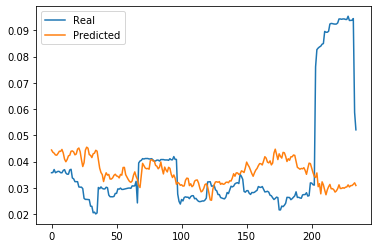

In [32]:
# Plot the real vs predicted prices as a line chart
bitcoin_price.plot()